### question 5

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

## load data0.txt
data = np.loadtxt('data0.txt', dtype=int)
x = data[:, :2]
y = data[:, 2]

## get number of unique classes
k = len(np.unique(y)) 
print(k)

4


In [ ]:
w = np.zeros((k, x.shape[1]))
b = np.zeros(k)
def multi_perceptron(w, b, x):
    predictions = np.dot(w, x) + b
    best_prediction = predictions.argsmax()
    print(predictions)
    print(best_prediction)
    return(best_prediction)
    

for xi, yi in zip(x, y):
    multi_perceptron(w, b, xi) 

[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0
[0. 0. 0. 0.]
0


note dims will match dims of classes 
 equations(w x) + b:[[  9.  -5.]
 [-53.  39.]
 [ 33. -40.]
 [ 11.   6.]]*x+[ 64. -15. -13. -36.]
converged on 199th itteration


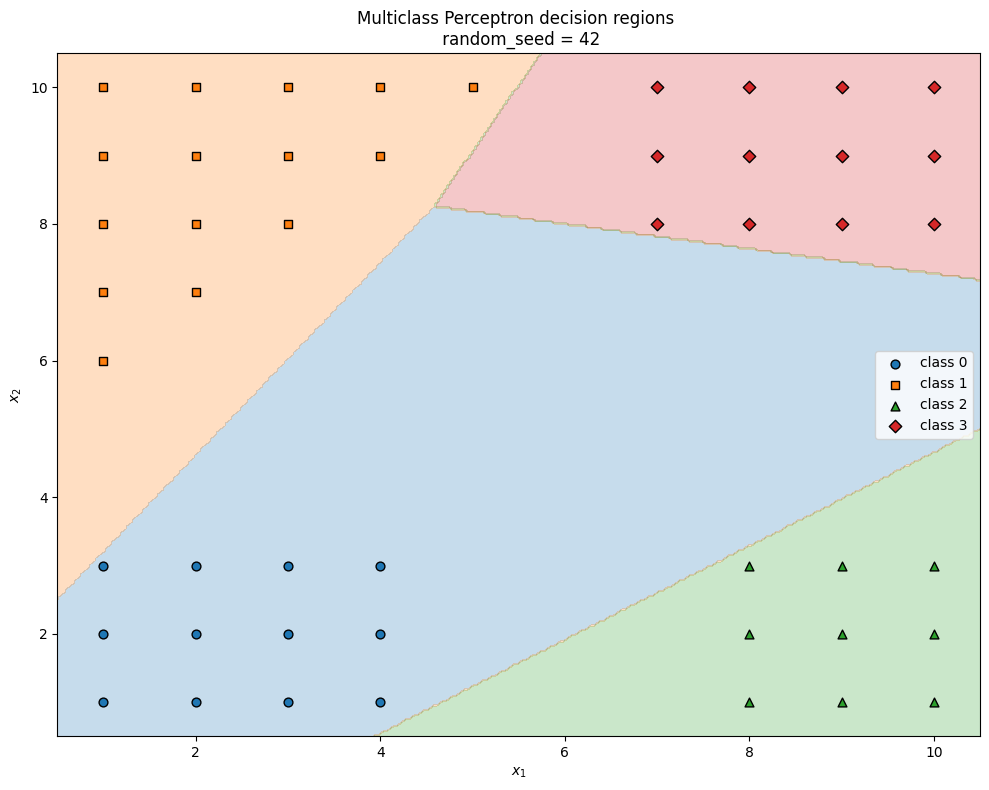

<Figure size 640x480 with 0 Axes>

In [50]:
def multi_perceptron(w, b, x):
    predictions = np.dot(w, x) + b
    best_prediction = predictions.argmax()
    return(best_prediction)
    

def fit_multi_perceptron(x, y, k,track_updates, set_seed):
    if set_seed:
        x, y = shuffle(x, y,random_state=42)
    else:
        x, y = shuffle(x, y)
    w = np.zeros((k, x.shape[1]))
    b = np.zeros(k)
    updates = 0
    max_updates = 1000

    def make_prediction(w, b, x, y, updates):
        error = False    
        for xi, yi in zip(x, y):
            predicted_y = multi_perceptron(w, b, xi) 
            if predicted_y != yi:
                w[yi] += xi
                b[yi] += 1
                w[predicted_y] -= xi
                b[predicted_y] -= 1
                updates += 1
                error = True  
        if updates <= max_updates:
            if error:
                return make_prediction(w, b, x, y, updates) 
            else:
                return (w, b, updates)
        else:
            print("Did not converge after {max_iterations} iterations")
    if track_updates:
        w, b, updates = make_prediction(w, b, x, y, updates)
        return (w, b, updates)
    else:
        w, b, updates = make_prediction(w, b, x, y, updates)
        return (w, b)
    
def plot_regions(X, y, W, b):
    # colour map for four classes
    cmap = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    markers = ['o', 's', '^', 'D']

    # mesh grid covering the data span
    margin = 0.5
    x_min, x_max = X[:,0].min() - margin, X[:,0].max() + margin
    y_min, y_max = X[:,1].min() - margin, X[:,1].max() + margin
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = np.array([multi_perceptron(W, b, p) for p in grid]).reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, preds, alpha=0.25, levels=np.arange(k+1)-0.5,
                 colors=cmap)
    # scatter original points
    for cls in range(k):
        idx = y == cls
        plt.scatter(X[idx,0], X[idx,1], c=cmap[cls], edgecolor='k',
                    label=f'class {cls}', s=40,marker=markers[cls])
    plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
    plt.title('Multiclass Perceptron decision regions \n random_seed = 42')
    plt.legend(); plt.tight_layout(); plt.show()
    plt.savefig('hw7_5_b.png')
    plt.show()

w,b,updates_count = fit_multi_perceptron(x, y, k,track_updates=True, set_seed=True)
print(f"note dims will match dims of classes \n equations(w x) + b:{w}*x+{b}")
print(f"converged on {updates_count}th itteration")
plot_regions(x, y, w, b)


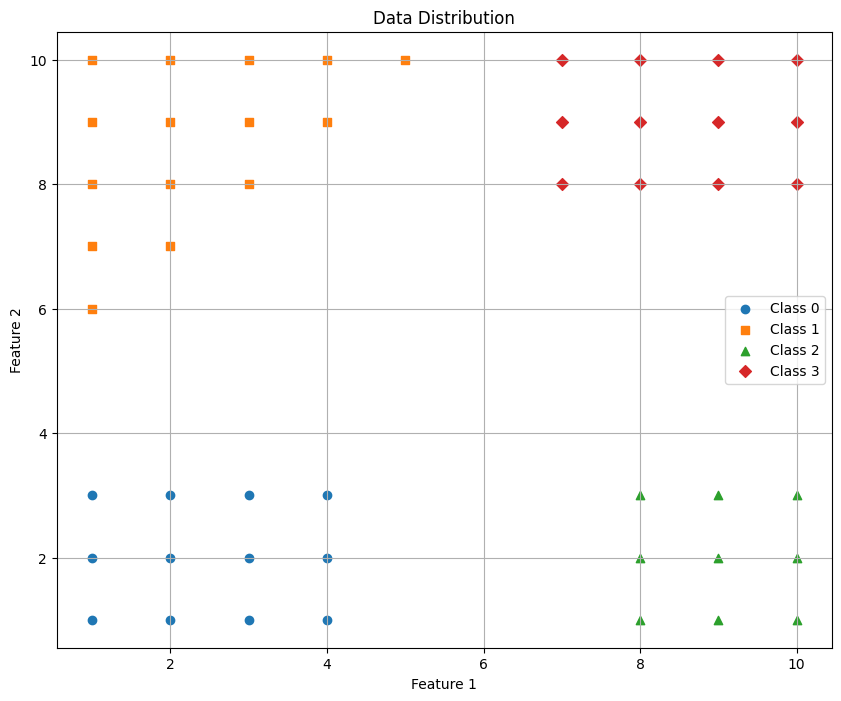

/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 0.01
Coefficients shape: (4, 2)
Intercepts: [ 0.08901627  0.00696956 -0.01669047 -0.07929536]
--------------------------------------------------
C = 0.1
Coefficients shape: (4, 2)
Intercepts: [ 0.82162957 -0.16978384 -0.22884462 -0.4230011 ]
--------------------------------------------------
C = 1.0
Coefficients shape: (4, 2)
Intercepts: [ 1.95090058 -0.60054793 -0.62389904 -0.72645361]
--------------------------------------------------


/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C = 10.0
Coefficients shape: (4, 2)
Intercepts: [ 2.22098106 -0.60041327 -1.09140418 -0.52916362]
--------------------------------------------------


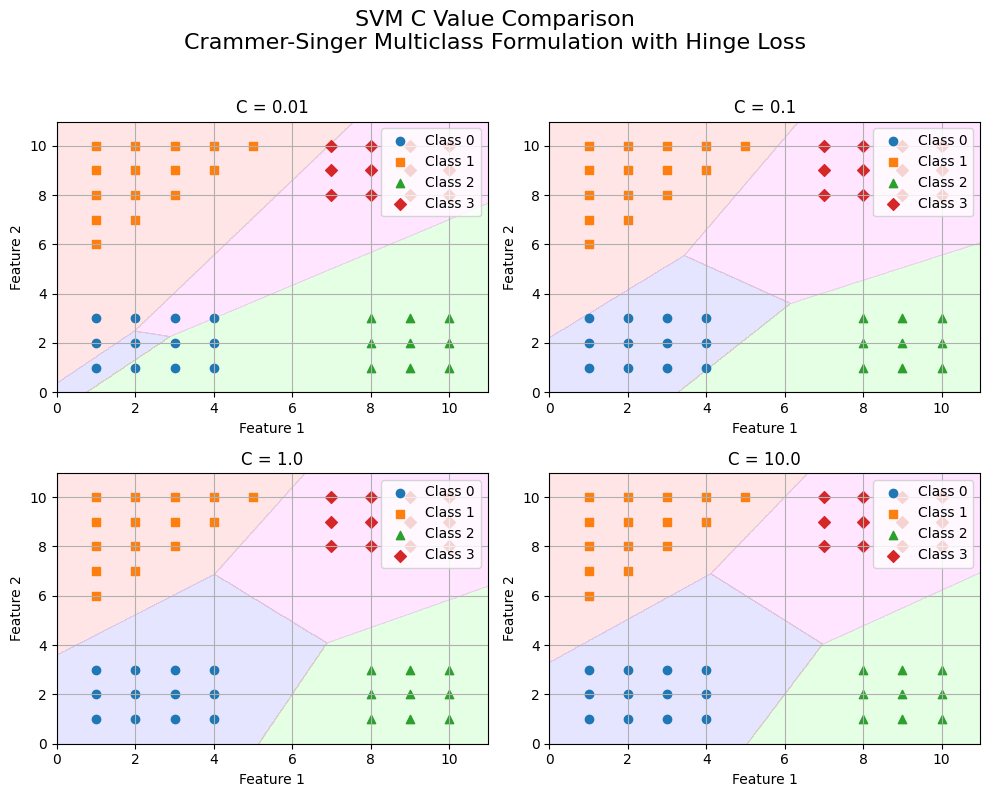


    Analysis of the effect of C parameter:
    
    1. With C = 0.01 (strong regularization):
       - Wider margins, smoother decision boundaries
       - More emphasis on simplicity and generalization
       - Potentially higher training error but better regularization
    
    2. With C = 0.1:
       - More balanced trade-off between margin width and classification accuracy
       - Decision boundaries remain relatively smooth
    
    3. With C = 1.0:
       - Increased focus on correctly classifying training points
       - Decision boundaries become more tailored to the data
    
    4. With C = 10.0 (weak regularization):
       - High emphasis on correctly classifying all training points
       - Decision boundaries become more complex to fit the training data
       - Potentially overfitting to the training set
    
    Key observations across C values:
    - As C increases, the model becomes more flexible and tries to fit the training data more closely
    - Smaller C values

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as colors

# Load the data
data = np.loadtxt('data0.txt')
X = data[:, :2]  # First two columns are features
y = data[:, 2].astype(int)  # Third column is the class label

# Let's first visualize the dataset to understand the class distribution
plt.figure(figsize=(10, 8))
class_labels = np.unique(y)
markers = ['o', 's', '^', 'D']  # Different markers for different classes
colors_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']  # Colors for different classes

for i, label in enumerate(class_labels):
    plt.scatter(X[y == label, 0], X[y == label, 1], 
                c=colors_list[i], marker=markers[i], label=f'Class {label}')

plt.title('Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Modified function to plot decision boundaries in a subplot
def plot_svm_comparison(X, y, C_values):
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle("SVM C Value Comparision")
    axes = axes.flatten()  # Flatten to make indexing easier
    
    # Create a mesh grid to visualize the decision boundary (outside the loop as it's the same for all)
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Create custom colormap for decision regions
    cmap = colors.ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA', '#FFAAFF'])
    
    # Train models and create subplots for different C values
    for i, C in enumerate(C_values):
        # Create and train the SVM classifier
        svm = LinearSVC(C=C, loss='hinge', multi_class='crammer_singer', 
                       random_state=42, max_iter=10000)
        svm.fit(X, y)
        
        # Predict class for each point in the mesh
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot on the respective subplot
        ax = axes[i]
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
        
        # Plot the training points
        for j, label in enumerate(class_labels):
            ax.scatter(X[y == label, 0], X[y == label, 1], 
                      c=colors_list[j], marker=markers[j], label=f'Class {label}')
        
        # Configure the subplot
        ax.set_title(f'C = {C}')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend(loc='upper right')
        ax.grid(True)
        
        # Print model information
        print(f"C = {C}")
        print(f"Coefficients shape: {svm.coef_.shape}")
        print(f"Intercepts: {svm.intercept_}")
        print("-" * 50)
    
    # Add a main title for the entire figure
    plt.suptitle('SVM C Value Comparison\nCrammer-Singer Multiclass Formulation with Hinge Loss', 
                fontsize=16, y=0.99)
    
    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Make room for suptitle
    
    # Show the plot
    plt.show()
    
    # Return a brief analysis of the effect of C
    return """
    Analysis of the effect of C parameter:
    
    1. With C = 0.01 (strong regularization):
       - Wider margins, smoother decision boundaries
       - More emphasis on simplicity and generalization
       - Potentially higher training error but better regularization
    
    2. With C = 0.1:
       - More balanced trade-off between margin width and classification accuracy
       - Decision boundaries remain relatively smooth
    
    3. With C = 1.0:
       - Increased focus on correctly classifying training points
       - Decision boundaries become more tailored to the data
    
    4. With C = 10.0 (weak regularization):
       - High emphasis on correctly classifying all training points
       - Decision boundaries become more complex to fit the training data
       - Potentially overfitting to the training set
    
    Key observations across C values:
    - As C increases, the model becomes more flexible and tries to fit the training data more closely
    - Smaller C values prioritize wider margins over accurate classification of every training point
    - Larger C values prioritize training accuracy over margin width
    - The optimal C value depends on the noise level and separability of the data
    """

# Train and visualize SVM models with different C values in a 2x2 subplot
C_values = [0.01, 0.1, 1.0, 10.0]
analysis = plot_svm_comparison(X, y, C_values)

# Print the analysis
print(analysis)

# Additional visualization to show a 3D representation of margin changes
from mpl_toolkits.mplot3d import Axes3D

# This function creates a 3D visualization showing how the margin changes with C
def visualize_margins_3d(X, y, C_values):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Colors for different C values
    c_colors = ['blue', 'green', 'orange', 'red']
    
    # For each C value, calculate distance to decision boundary
    for i, C in enumerate(C_values):
        # Train the SVM
        svm = LinearSVC(C=C, loss='hinge', multi_class='crammer_singer', 
                       random_state=42, max_iter=10000)
        svm.fit(X, y)
        
        # For simplicity, we'll just look at the first binary boundary (class 0 vs rest)
        w = svm.coef_[0]
        b = svm.intercept_[0]
        
        # Normalize w to get unit vector
        norm_w = np.linalg.norm(w)
        w_unit = w / norm_w
        
        # Calculate distance to decision boundary for visualization
        # For a point x, distance = |w·x + b| / ||w||
        # We'll add this as z-coordinate in 3D space
        distances = []
        for x_i in X:
            # Simple functional margin (not normalized) for visualization
            dist = np.abs(np.dot(w, x_i) + b) / norm_w
            distances.append(dist * 0.5)  # Scale for visualization
        
        # Plot in 3D space
        z_offset = i * 2  # Separate different C values along z-axis
        ax.scatter(X[:, 0], X[:, 1], distances, c=c_colors[i], 
                  marker='o', alpha=0.6, label=f'C = {C}')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Relative Distance to Decision Boundary')
    ax.set_title('Visualization of SVM Margin Changes with Different C Values')
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Uncomment the following line if you want to include the 3D visualization
# visualize_margins_3d(X, y, C_values)

/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


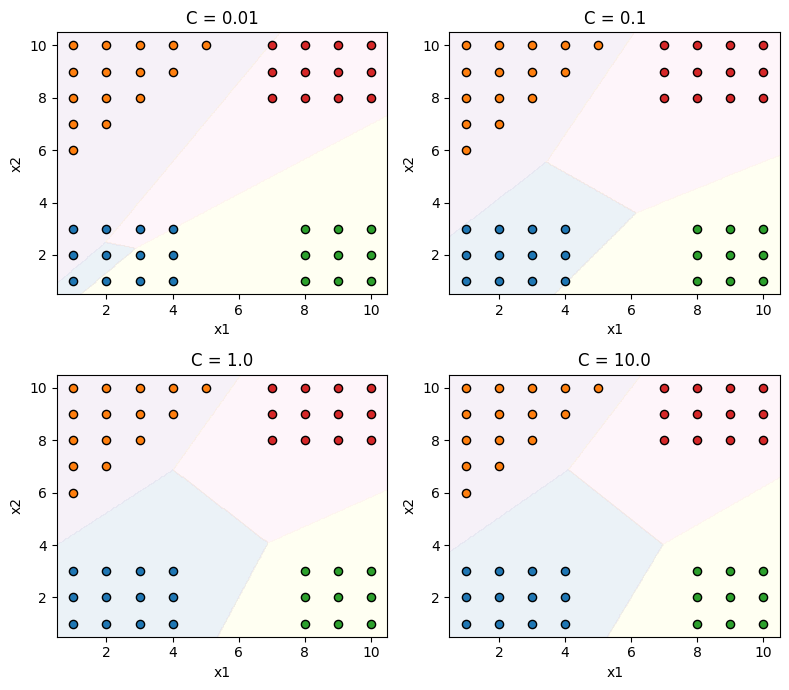

In [32]:
# -------------------------------------------------------------
# Multiclass SVM on data0.txt  (four Cs, one figure)
# -------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

# 1. Load data  ------------------------------------------------
data = np.loadtxt('data0.txt')
X, y = data[:, :2], data[:, 2].astype(int)
k = int(y.max()) + 1               # number of classes (should be 4)

# 2. Fit an SVM for each C ------------------------------------
Cs = [0.01, 0.1, 1.0, 10.0]
models = [
    LinearSVC(loss='hinge',
              multi_class='crammer_singer',
              C=C,
              max_iter=10_000,
              dual=True,
              random_state=0).fit(X, y)
    for C in Cs
]

# 3. Plot decision regions ------------------------------------
# Build a grid that covers the data span
margin = 0.5
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

fig, axes = plt.subplots(2, 2, figsize=(8, 7))
for ax, mdl, C in zip(axes.ravel(), models, Cs):
    zz = mdl.predict(grid).reshape(xx.shape)

    # pastel decision regions
    ax.contourf(xx, yy, zz,
                alpha=0.25,
                levels=np.arange(k + 1) - 0.5,
                cmap='Pastel1')

    # original points
    for cls in range(k):
        pts = y == cls
        ax.scatter(X[pts, 0], X[pts, 1],
                   s=35, edgecolor='k',
                   label=f'class {cls}')
    ax.set_title(f'C = {C}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

plt.tight_layout()
plt.show()


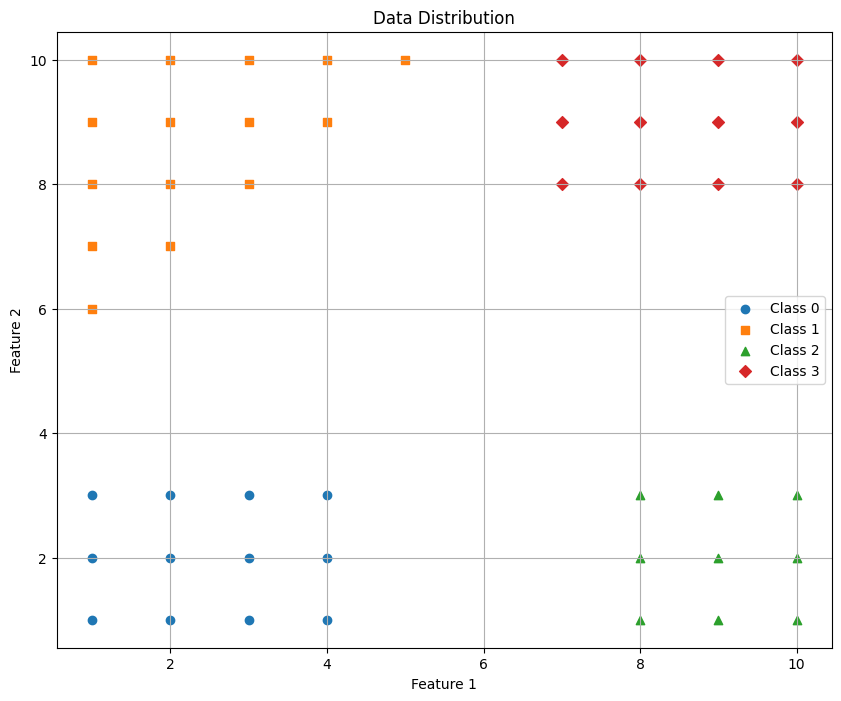

/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


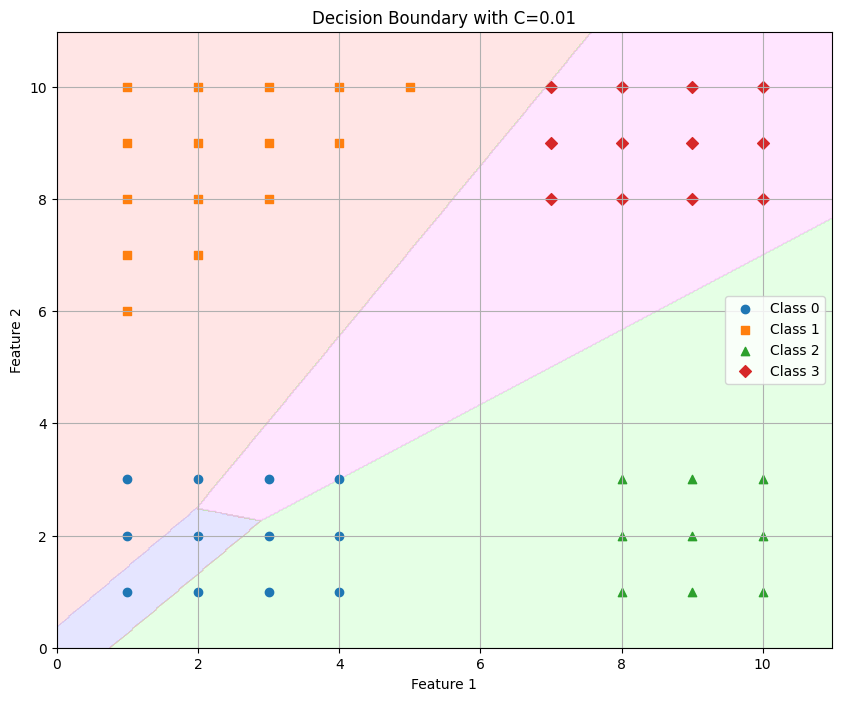

C = 0.01
Coefficients shape: (4, 2)
Intercepts: [ 0.08901627  0.00696956 -0.01669047 -0.07929536]
--------------------------------------------------


/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


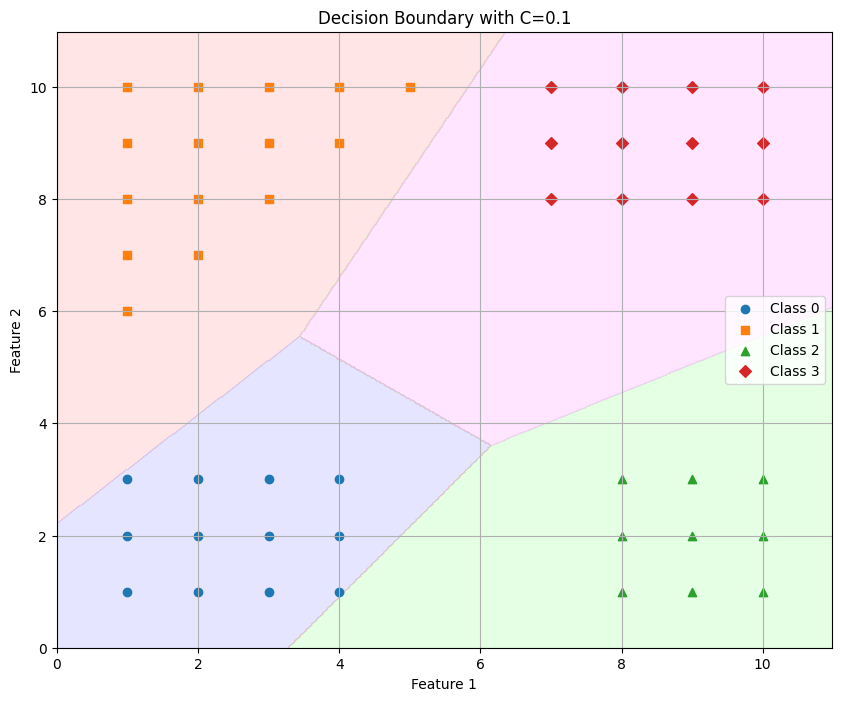

C = 0.1
Coefficients shape: (4, 2)
Intercepts: [ 0.82162957 -0.16978384 -0.22884462 -0.4230011 ]
--------------------------------------------------


/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


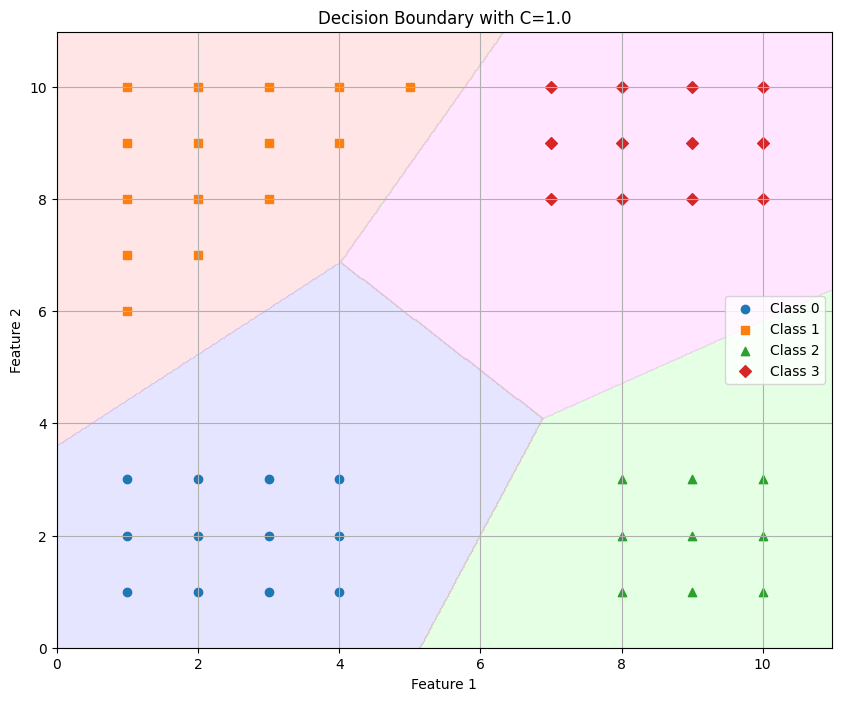

C = 1.0
Coefficients shape: (4, 2)
Intercepts: [ 1.95090058 -0.60054793 -0.62389904 -0.72645361]
--------------------------------------------------


/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


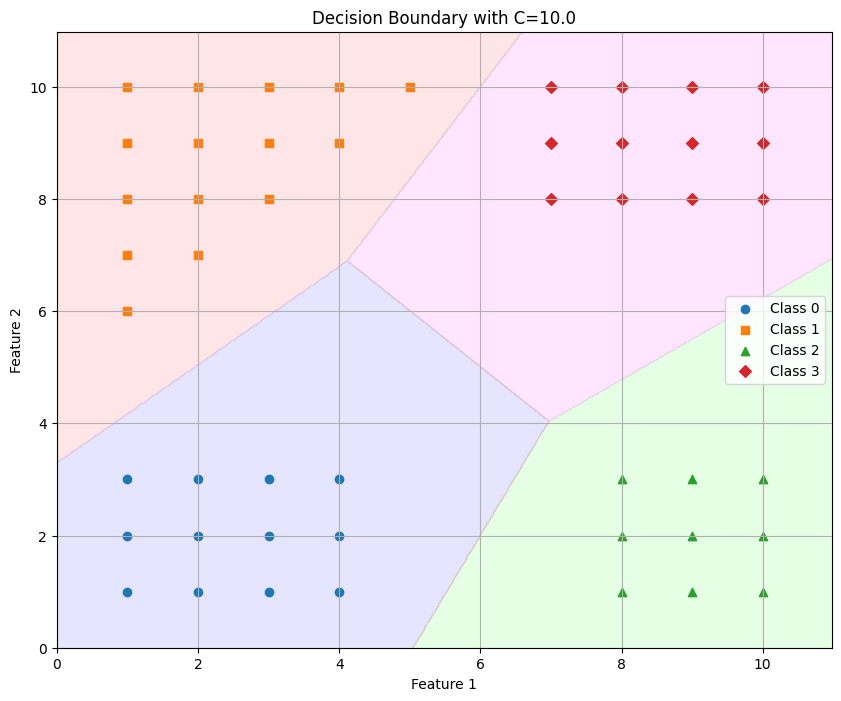

C = 10.0
Coefficients shape: (4, 2)
Intercepts: [ 2.22098106 -0.60041327 -1.09140418 -0.52916362]
--------------------------------------------------
Analysis of the effect of C parameter:

As C increases:
1. The decision boundaries become more flexible and try to fit the training data more closely.
2. With small C values, the SVM prioritizes a wider margin at the expense of misclassification.
3. With large C values, the SVM tries to minimize misclassification at the expense of margin width.
4. We can observe how the decision boundaries adapt to the class distribution patterns.



In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import matplotlib.colors as colors

# Load the data
data = np.loadtxt('data0.txt')
X = data[:, :2]  # First two columns are features
y = data[:, 2].astype(int)  # Third column is the class label

# Let's first visualize the dataset to understand the class distribution
plt.figure(figsize=(10, 8))
class_labels = np.unique(y)
markers = ['o', 's', '^', 'D']  # Different markers for different classes
colors_list = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'] # Colors for different classes


for i, label in enumerate(class_labels):
    plt.scatter(X[y == label, 0], X[y == label, 1], 
                c=colors_list[i], marker=markers[i], label=f'Class {label}')

plt.title('Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, C_value):
    # Create a mesh grid to visualize the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict class for each point in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create custom colormap for decision regions
    cmap = colors.ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA', '#FFAAFF'])
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    
    # Plot the training points
    for i, label in enumerate(class_labels):
        plt.scatter(X[y == label, 0], X[y == label, 1], 
                    c=colors_list[i], marker=markers[i], label=f'Class {label}')
        
    handles, labels = ax.get_legend_handles_labels()  # any ax is fine
    fig.legend(handles, labels,
           loc='upper center',
           bbox_to_anchor=(0.5, 0.97),  # tweak vertical gap if needed
           ncol=len(class_labels),
           frameon=False)
    
    plt.title(f'Decision Boundary with C={C_value}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Train and visualize SVM models with different C values
C_values = [0.01, 0.1, 1.0, 10.0]

for C in C_values:
    # Create and train the SVM classifier
    svm = LinearSVC(C=C, loss='hinge', multi_class='crammer_singer', 
                   random_state=42, max_iter=10000)
    svm.fit(X, y)
    
    # Plot the decision boundary
    plot_decision_boundary(svm, X, y, C)
    
    # Print the model coefficients (weights) and intercepts
    print(f"C = {C}")
    print(f"Coefficients shape: {svm.coef_.shape}")
    print(f"Intercepts: {svm.intercept_}")
    print("-" * 50)

# Analysis of how C affects the decision boundary
print("Analysis of the effect of C parameter:")
print("""
As C increases:
1. The decision boundaries become more flexible and try to fit the training data more closely.
2. With small C values, the SVM prioritizes a wider margin at the expense of misclassification.
3. With large C values, the SVM tries to minimize misclassification at the expense of margin width.
4. We can observe how the decision boundaries adapt to the class distribution patterns.
""")

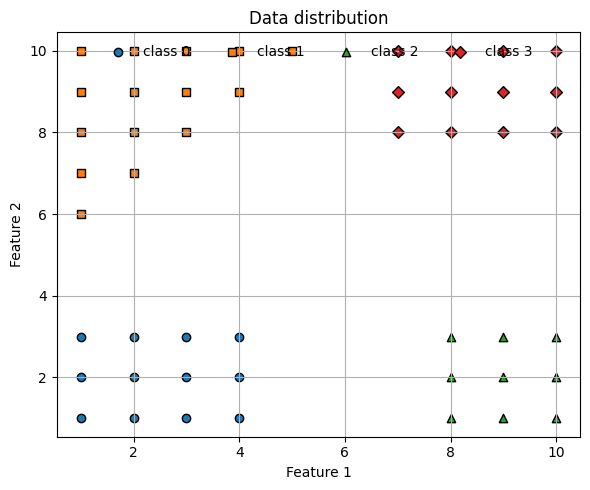

/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/scotty/venvs/ucsd/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


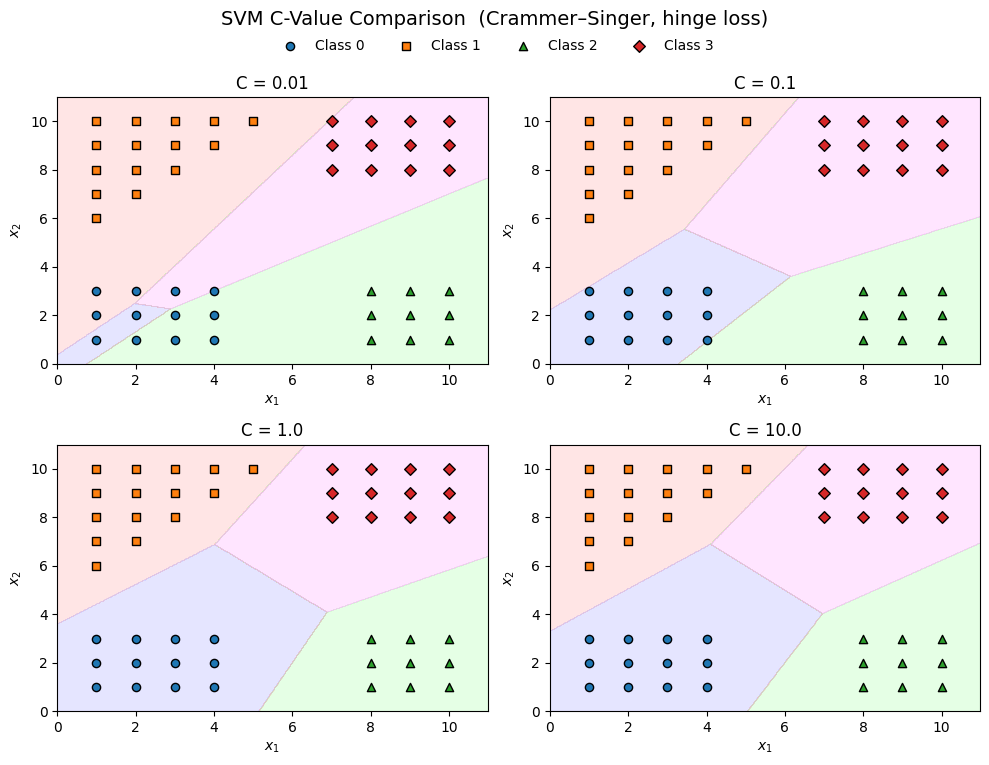

In [49]:
"""
Multiclass SVM demo on data0.txt
• Four C values  (0.01, 0.1, 1.0, 10.0)
• Single global legend centred above the 2×2 grid (one row, four entries)
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
import matplotlib.colors as mcolors

# ------------------------------------------------------------------
# 1. Load data ------------------------------------------------------
data = np.loadtxt("data0.txt")
X, y        = data[:, :2], data[:, 2].astype(int)
class_labels = np.unique(y)
k            = len(class_labels)

# Marker / colour helpers for plotting points
markers      = ['o', 's', '^', 'D']
colour_list  = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# ------------------------------------------------------------------
# 2. Quick scatter of raw data -------------------------------------
plt.figure(figsize=(6, 5))
for j, lab in enumerate(class_labels):
    plt.scatter(X[y == lab, 0], X[y == lab, 1],
                c=colour_list[j], marker=markers[j], edgecolor='k',
                label=f"class {lab}")
plt.title("Data distribution")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.grid(True); plt.legend(ncol=k, frameon=False, loc="upper center")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------------
# 3. Function: train four SVMs -> 2×2 grid --------------------------
def plot_svm_comparison(X, y, C_values):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    # global title
    fig.suptitle("SVM C-Value Comparison  (Crammer–Singer, hinge loss)",
                 fontsize=14, y=0.95)

    # mesh grid once for all plots
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    cmap = mcolors.ListedColormap(
        ['#AAAAFF', '#FFAAAA', '#AAFFAA', '#FFAAFF'])

    handles_any_ax = None  # will collect legend handles once

    for ax, C in zip(axes, C_values):
        clf = LinearSVC(C=C, loss="hinge",
                        multi_class="crammer_singer",
                        max_iter=10_000, random_state=0)
        clf.fit(X, y)

        # decision regions
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

        # scatter points
        for j, lab in enumerate(class_labels):
            pts = y == lab
            sc = ax.scatter(X[pts, 0], X[pts, 1],
                            c=colour_list[j], marker=markers[j],
                            edgecolor='k', s=35, label=f"Class {lab}")
            # save handles only once
            if handles_any_ax is None and j == k - 1:
                handles_any_ax, labels_any_ax = ax.get_legend_handles_labels()

        ax.set_title(f"C = {C}")
        ax.set_xlabel('$x_1$')
        ax.set_ylabel('$x_2$')
        #ax.grid(True)

    # global legend (1×4) just under suptitle
    fig.legend(handles_any_ax, labels_any_ax,
               loc="upper center", ncol=k,
               bbox_to_anchor=(0.5, 0.93), frameon=False)

    plt.tight_layout(rect=[0, 0, 1, 0.93])  # leave space top for legend
    plt.savefig('hw7_6_a.png')
    plt.show()

# ------------------------------------------------------------------
C_values = [0.01, 0.1, 1.0, 10.0]
plot_svm_comparison(X, y, C_values)


Epoch 1/1000, Mistakes: 29
Epoch 2/1000, Mistakes: 16
Epoch 3/1000, Mistakes: 15
Epoch 4/1000, Mistakes: 12
Epoch 5/1000, Mistakes: 21
Epoch 6/1000, Mistakes: 3
Epoch 7/1000, Mistakes: 5
Epoch 8/1000, Mistakes: 10
Epoch 9/1000, Mistakes: 8
Epoch 10/1000, Mistakes: 4
Epoch 11/1000, Mistakes: 3
Epoch 12/1000, Mistakes: 7
Epoch 13/1000, Mistakes: 8
Epoch 14/1000, Mistakes: 4
Epoch 15/1000, Mistakes: 4
Epoch 16/1000, Mistakes: 4
Epoch 17/1000, Mistakes: 8
Epoch 18/1000, Mistakes: 4
Epoch 19/1000, Mistakes: 6
Epoch 20/1000, Mistakes: 8
Epoch 21/1000, Mistakes: 5
Epoch 22/1000, Mistakes: 1
Epoch 23/1000, Mistakes: 0
Converged after 23 epochs!


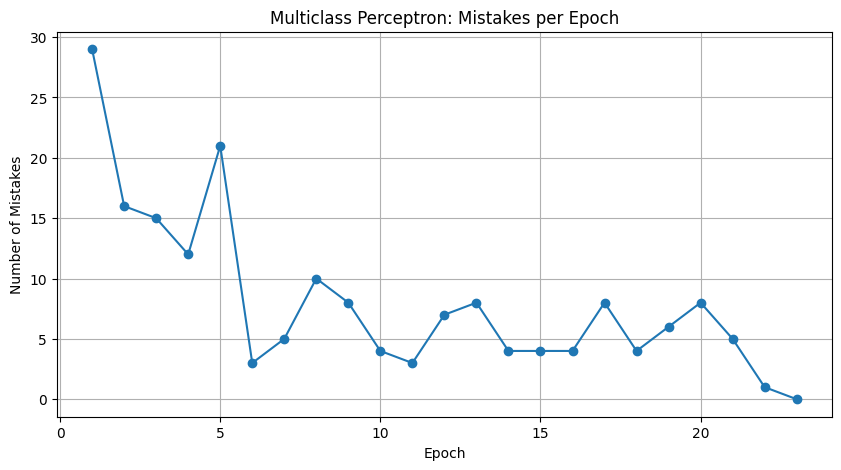

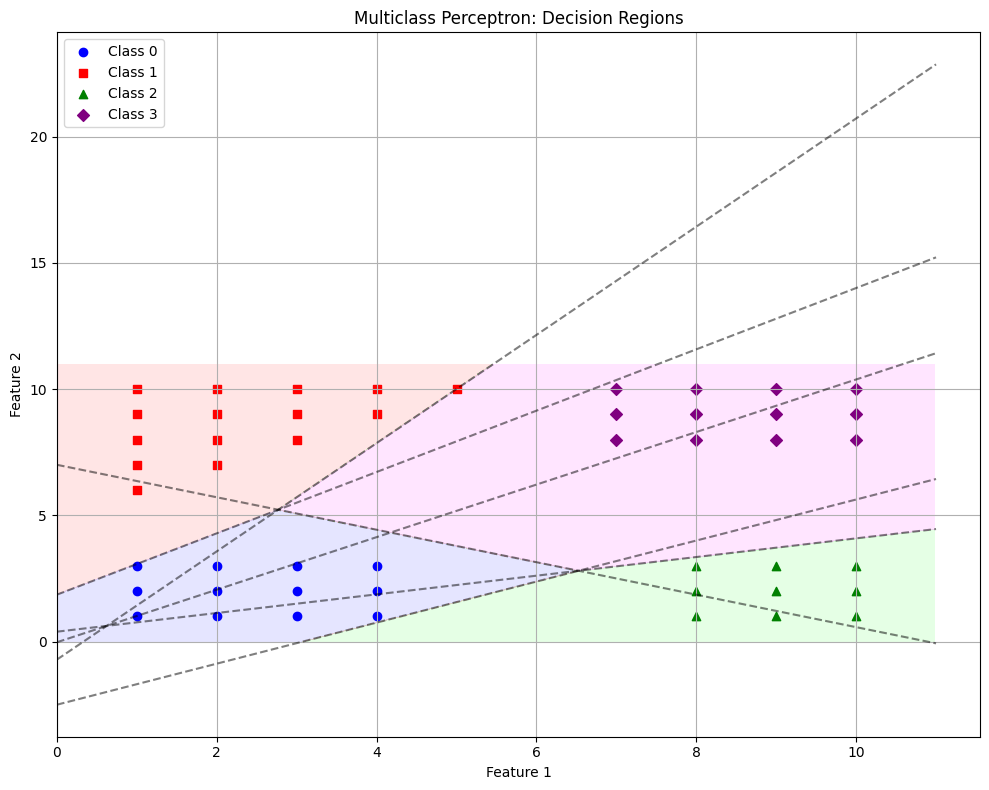

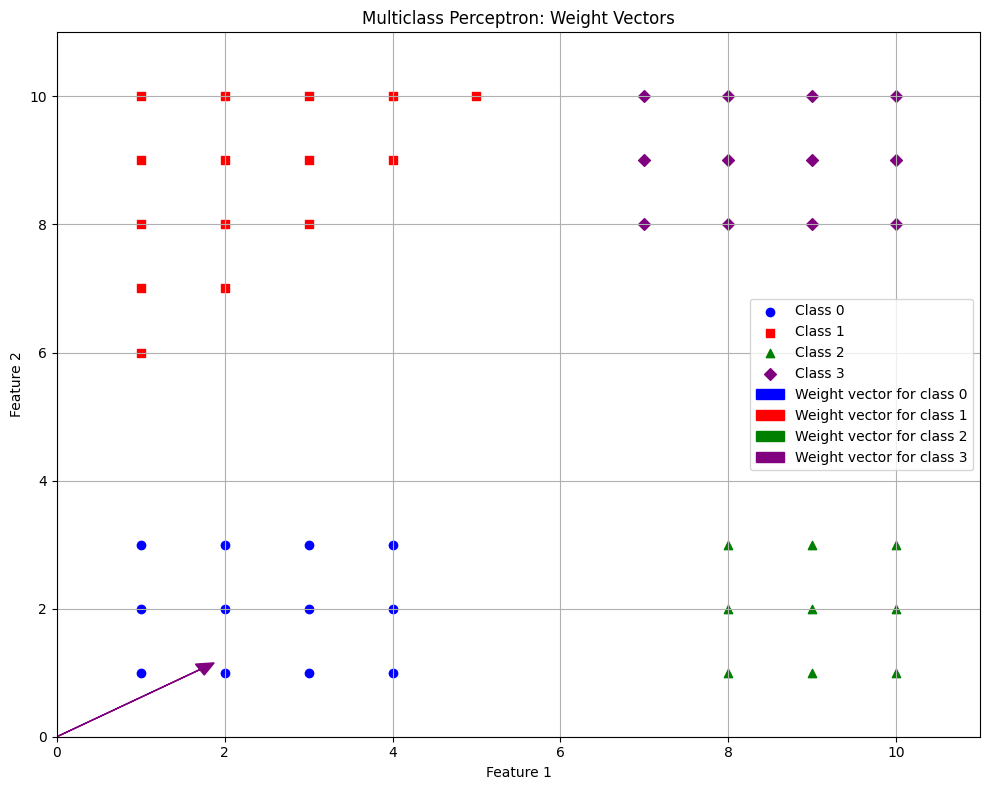

Learned weight matrix (including bias term):
Class 0: [ 4. -6. 64.]
Class 1: [-47.  36. -14.]
Class 2: [ 30. -38. -16.]
Class 3: [ 13.   8. -34.]

Theoretical insights:

1. The multiclass perceptron extends the binary perceptron by learning a weight vector for each class.
2. For a given input x, the class with the highest score w_i ⋅ x is chosen as the prediction.
3. On a mistake, the algorithm:
   - Decreases the weights for the incorrectly predicted class
   - Increases the weights for the true class
4. The decision boundary between classes i and j is a hyperplane defined by w_i ⋅ x = w_j ⋅ x
5. If the data is linearly separable, the perceptron algorithm is guaranteed to converge to a solution.
6. Each weight vector points in the direction of the "center" of its corresponding class.



In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# 1. Load the data
data = np.loadtxt('data0.txt')
X = data[:, :2]  # First two columns are features
y = data[:, 2].astype(int)  # Third column is the class label
num_classes = len(np.unique(y))  # Number of unique classes

# Add a bias term to the feature matrix
X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

# 2. Implement the multiclass Perceptron algorithm
class MulticlassPerceptron:
    def __init__(self, n_features, n_classes):
        # Initialize weights for each class
        # For each class, we have weights for each feature + bias
        self.W = np.zeros((n_classes, n_features + 1))
        
    def predict(self, X):
        # X has shape (n_samples, n_features + 1) including bias
        # W has shape (n_classes, n_features + 1)
        # scores will have shape (n_samples, n_classes)
        scores = np.dot(X, self.W.T)
        # Return the class with the highest score for each sample
        return np.argmax(scores, axis=1)
    
    def score_function(self, X):
        """Return the raw scores for all classes"""
        return np.dot(X, self.W.T)
    
    def fit(self, X, y, max_iterations=1000):
        """
        Train the multiclass perceptron
        
        X: training features with bias term (n_samples, n_features + 1)
        y: training labels (n_samples,)
        max_iterations: maximum number of passes through the dataset
        
        Returns: list of mistake counts per epoch
        """
        n_samples = X.shape[0]
        mistakes_history = []
        
        for iteration in range(max_iterations):
            mistakes = 0
            
            # Shuffle the data for each epoch
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            for i in range(n_samples):
                x_i = X_shuffled[i]
                y_i = y_shuffled[i]
                
                # Compute scores for all classes
                scores = np.dot(x_i, self.W.T)
                
                # Find the predicted class (highest score)
                y_pred = np.argmax(scores)
                
                # Update weights if prediction is wrong
                if y_pred != y_i:
                    mistakes += 1
                    # Decrease weights for the predicted class
                    self.W[y_pred] -= x_i
                    # Increase weights for the true class
                    self.W[y_i] += x_i
            
            mistakes_history.append(mistakes)
            print(f"Epoch {iteration+1}/{max_iterations}, Mistakes: {mistakes}")
            
            # Early stopping if no mistakes were made
            if mistakes == 0:
                print(f"Converged after {iteration+1} epochs!")
                break
                
        return mistakes_history

# 3. Train the model
perceptron = MulticlassPerceptron(n_features=X_bias.shape[1]-1, n_classes=num_classes)
mistakes_history = perceptron.fit(X_bias, y)

# 4. Plot the mistake history
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(mistakes_history)+1), mistakes_history, marker='o')
plt.title('Multiclass Perceptron: Mistakes per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Number of Mistakes')
plt.grid(True)
plt.show()

# 5. Function to plot decision regions
def plot_decision_boundary(classifier, X, y):
    # Create a mesh grid to visualize the decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Add bias term to the mesh points
    mesh_points = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.ravel().shape[0])]
    
    # Predict class for each point in the mesh
    Z = classifier.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Create custom colormap for decision regions
    cmap = colors.ListedColormap(['#AAAAFF', '#FFAAAA', '#AAFFAA', '#FFAAFF'])
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    
    # Define markers and colors for the classes
    markers = ['o', 's', '^', 'D']  # Different markers for different classes
    colors_list = ['blue', 'red', 'green', 'purple']  # Colors for different classes
    
    # Plot the training points
    for i in range(num_classes):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                    c=colors_list[i], marker=markers[i], label=f'Class {i}')
    
    # Plot the decision boundaries (hyperplanes where scores are equal)
    # This will help visualize the actual decision boundaries between classes
    if num_classes > 2:
        # For multiclass, we can visualize where each pair of classes has equal scores
        for i in range(num_classes):
            for j in range(i+1, num_classes):
                # Find the hyperplane where class i and class j have equal scores
                # W_i · x = W_j · x  =>  (W_i - W_j) · x = 0
                w_diff = perceptron.W[i] - perceptron.W[j]
                
                # If the first two components (corresponding to the two features) are not close to zero
                if np.abs(w_diff[1]) > 1e-10:
                    # Line equation: w_diff[0]*x + w_diff[1]*y + w_diff[2] = 0
                    # Solved for y: y = (-w_diff[0]*x - w_diff[2]) / w_diff[1]
                    x_line = np.array([x_min, x_max])
                    y_line = (-w_diff[0]*x_line - w_diff[2]) / w_diff[1]
                    plt.plot(x_line, y_line, '--', c='black', alpha=0.5)
    
    plt.title('Multiclass Perceptron: Decision Regions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Now let's visualize the weight vectors for each class
    plt.figure(figsize=(10, 8))
    
    # Plot the data points again for reference
    for i in range(num_classes):
        plt.scatter(X[y == i, 0], X[y == i, 1], 
                    c=colors_list[i], marker=markers[i], label=f'Class {i}')
    
    # For each class, draw the weight vector (first two components, excluding bias)
    # These vectors point perpendicular to the decision boundaries
    for i in range(num_classes):
        # Draw the weight vector from origin
        w1, w2 = perceptron.W[i, :2]  # Get the weights for features (excluding bias)
        
        # Scale down the vectors for better visualization
        scale = 2.0 / np.sqrt(w1**2 + w2**2) if (w1**2 + w2**2) > 0 else 0
        
        plt.arrow(0, 0, w1*scale, w2*scale, 
                 head_width=0.2, head_length=0.2, fc=colors_list[i], ec=colors_list[i],
                 label=f'Weight vector for class {i}')
    
    plt.title('Multiclass Perceptron: Weight Vectors')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 6. Visualize the results
plot_decision_boundary(perceptron, X, y)

# 7. Print the learned weight matrix
print("Learned weight matrix (including bias term):")
for i in range(num_classes):
    print(f"Class {i}: {perceptron.W[i]}")

# 8. Theoretical explanation
print("\nTheoretical insights:")
print("""
1. The multiclass perceptron extends the binary perceptron by learning a weight vector for each class.
2. For a given input x, the class with the highest score w_i ⋅ x is chosen as the prediction.
3. On a mistake, the algorithm:
   - Decreases the weights for the incorrectly predicted class
   - Increases the weights for the true class
4. The decision boundary between classes i and j is a hyperplane defined by w_i ⋅ x = w_j ⋅ x
5. If the data is linearly separable, the perceptron algorithm is guaranteed to converge to a solution.
6. Each weight vector points in the direction of the "center" of its corresponding class.
""")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def multi_perceptron(w, b, x):
    """
    Make a prediction using the multiclass perceptron.
    
    Parameters:
    - w: Weight matrix of shape (num_classes, num_features)
    - b: Bias vector of shape (num_classes,)
    - x: Feature vector of shape (num_features,)
    
    Returns:
    - The predicted class (index of maximum score)
    """
    predictions = np.dot(w, x) + b
    best_prediction = predictions.argmax()
    return best_prediction

def fit_multi_perceptron(x, y, k, track_updates=True, set_seed=True, max_updates=1000):
    """
    Train a multiclass perceptron using the standard update rule.
    
    Parameters:
    - x: Feature matrix of shape (num_samples, num_features)
    - y: Label vector of shape (num_samples,)
    - k: Number of classes
    - track_updates: Whether to return the number of updates performed
    - set_seed: Whether to set a fixed random seed for shuffling
    - max_updates: Maximum number of weight updates before stopping
    
    Returns:
    - w: Trained weight matrix
    - b: Trained bias vector
    - updates: Number of updates performed (only if track_updates=True)
    """
    # Shuffle the data
    if set_seed:
        x, y = shuffle(x, y, random_state=42)
    else:
        x, y = shuffle(x, y)
    
    # Initialize weights and biases
    w = np.zeros((k, x.shape[1]))
    b = np.zeros(k)
    
    # Use an iterative approach instead of recursion to avoid stack overflow
    updates = 0
    converged = False
    
    while not converged and updates < max_updates:
        error = False
        for xi, yi in zip(x, y):
            predicted_y = multi_perceptron(w, b, xi)
            if predicted_y != yi:
                # Update weights and biases
                w[yi] += xi
                b[yi] += 1
                w[predicted_y] -= xi
                b[predicted_y] -= 1
                updates += 1
                error = True
        
        # If no errors in this epoch, we've converged
        if not error:
            converged = True
    
    if not converged:
        print(f"Did not converge after {max_updates} updates")
    
    if track_updates:
        return w, b, updates
    else:
        return w, b

def plot_regions(X, y, W, b, random_seed=None, save_fig=False, filename=None):
    """
    Plot the decision regions of a multiclass perceptron.
    
    Parameters:
    - X: Feature matrix
    - y: Label vector
    - W: Weight matrix
    - b: Bias vector
    - random_seed: The random seed used for training (for title)
    - save_fig: Whether to save the figure to a file
    - filename: Name of the file to save the figure to
    """
    # Get number of classes
    k = len(np.unique(y))
    
    # Colour map for classes
    cmap = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    
    # Create mesh grid covering the data span
    margin = 0.5
    x_min, x_max = X[:,0].min() - margin, X[:,0].max() + margin
    y_min, y_max = X[:,1].min() - margin, X[:,1].max() + margin
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Make predictions on the grid
    preds = np.array([multi_perceptron(W, b, p) for p in grid]).reshape(xx.shape)
    
    # Plot the decision regions
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, preds, alpha=0.25, levels=np.arange(k+1)-0.5,
                colors=cmap[:k])
    
    # Scatter original points
    for cls in range(k):
        idx = y == cls
        plt.scatter(X[idx,0], X[idx,1], c=cmap[cls], edgecolor='k',
                   label=f'Class {cls}', s=40)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    title = 'Multiclass Perceptron Decision Regions'
    if random_seed is not None:
        title += f'\nrandom_seed = {random_seed}'
    plt.title(title)
    
    plt.legend()
    plt.tight_layout()
    
    if save_fig and filename:
        plt.savefig(filename)
    
    plt.show()

# Load and process the data
data = np.loadtxt('data0.txt')
X = data[:, :2]  # Features
y = data[:, 2].astype(int)  # Labels
num_classes = len(np.unique(y))

# Train the perceptron and track updates
W, b, updates = fit_multi_perceptron(X, y, num_classes, track_updates=True, set_seed=True)
print(f"Perceptron converged after {updates} updates")

# Plot the decision regions
plot_regions(X, y, W, b, random_seed=42)

# Visualize the weight vectors
plt.figure(figsize=(10, 8))

# Plot the data points as reference
cmap = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for cls in range(num_classes):
    idx = y == cls
    plt.scatter(X[idx,0], X[idx,1], c=cmap[cls], edgecolor='k',
               label=f'Class {cls}', s=40)

# Plot the weight vectors from origin
for i in range(num_classes):
    w1, w2 = W[i]
    # Scale the vectors for better visualization
    scale = 2.0 / np.sqrt(w1**2 + w2**2) if (w1**2 + w2**2) > 0 else 0
    plt.arrow(0, 0, w1*scale, w2*scale, 
             head_width=0.2, head_length=0.2, fc=cmap[i], ec=cmap[i],
             label=f'Weight vector for class {i}')

plt.title('Multiclass Perceptron: Weight Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
margin = 0.5
x_min, x_max = X[:,0].min() - margin, X[:,0].max() + margin
y_min, y_max = X[:,1].min() - margin, X[:,1].max() + margin
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Compare with my previous implementation
print("Theoretical comparison with the previous implementation:")
print("""
1. Both implementations represent the multiclass perceptron model correctly:
   - They maintain separate weight vectors for each class
   - They predict using the maximum score rule
   - They update weights by adding to the correct class and subtracting from the predicted class

2. Key differences:
   - This implementation uses separate bias terms
   - Previous implementation included bias in the feature matrix
   - This implementation uses an iterative approach for convergence
   - Previous implementation was epoch-based with mistake counting

3. Both should converge to similar solutions if the data is linearly separable
   (though exact weights may differ due to initialization and update order)

4. The decision boundaries and regions should be comparable between implementations
""")